In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv("CVD_cleaned.csv")

In [3]:
raw_data.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [47]:
import pandas_profiling as pp
pp.ProfileReport(raw_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
raw_data.shape

(308854, 19)

In [5]:
# Check for duplicates and show the duplicate rows
duplicates = raw_data.duplicated(keep=False)
duplicate_rows = raw_data[duplicates]

print(duplicate_rows)


       General_Health               Checkup Exercise Heart_Disease  \
368         Very Good  Within the past year      Yes            No   
5339        Very Good  Within the past year      Yes            No   
10086       Very Good  Within the past year      Yes            No   
13312       Excellent  Within the past year      Yes            No   
14095       Very Good  Within the past year      Yes            No   
...               ...                   ...      ...           ...   
301474           Good  Within the past year      Yes            No   
303040      Very Good  Within the past year      Yes            No   
303600           Good  Within the past year      Yes            No   
303609      Very Good  Within the past year      Yes            No   
308375      Very Good  Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
368             No           No         No       No        No    Male   
5339         

In [6]:
# Remove duplicate rows and keep the first occurrence
df_no_duplicates = raw_data.drop_duplicates()

print(df_no_duplicates)


       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

In [46]:
raw_data.shape

(308854, 19)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [8]:
raw_data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [9]:
raw_data.isnull().any()

General_Health                  False
Checkup                         False
Exercise                        False
Heart_Disease                   False
Skin_Cancer                     False
Other_Cancer                    False
Depression                      False
Diabetes                        False
Arthritis                       False
Sex                             False
Age_Category                    False
Height_(cm)                     False
Weight_(kg)                     False
BMI                             False
Smoking_History                 False
Alcohol_Consumption             False
Fruit_Consumption               False
Green_Vegetables_Consumption    False
FriedPotato_Consumption         False
dtype: bool

In [10]:
raw_data.describe()

Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [11]:
raw_data["General_Health"].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [12]:
raw_data["Checkup"].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [13]:
raw_data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [14]:
# Converting a float value to int
raw_data["Alcohol_Consumption"]=raw_data["Alcohol_Consumption"].astype('int64')
raw_data["Height_(cm)"]=raw_data["Height_(cm)"].astype('int64')
raw_data["Weight_(kg)"]=raw_data["Weight_(kg)"].astype('int64')
raw_data["BMI"]=raw_data["BMI"].astype('int64')
raw_data["Fruit_Consumption"]=raw_data["Fruit_Consumption"].astype('int64')
raw_data["Green_Vegetables_Consumption"]=raw_data["Green_Vegetables_Consumption"].astype("int64")
raw_data["FriedPotato_Consumption"]=raw_data["FriedPotato_Consumption"].astype('int64')

In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   General_Health                308854 non-null  object
 1   Checkup                       308854 non-null  object
 2   Exercise                      308854 non-null  object
 3   Heart_Disease                 308854 non-null  object
 4   Skin_Cancer                   308854 non-null  object
 5   Other_Cancer                  308854 non-null  object
 6   Depression                    308854 non-null  object
 7   Diabetes                      308854 non-null  object
 8   Arthritis                     308854 non-null  object
 9   Sex                           308854 non-null  object
 10  Age_Category                  308854 non-null  object
 11  Height_(cm)                   308854 non-null  int64 
 12  Weight_(kg)                   308854 non-null  int64 
 13 

In [16]:
raw_data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

# Reordering a Columns

In [17]:
raw_data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [18]:
reorder_columns = ['General_Health','Sex','Age_Category', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis',
        'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

In [19]:
df_columns = reorder_columns

In [20]:
raw_data=raw_data[reorder_columns]

In [21]:
raw_data.head()

General_Health     Sex Age_Category                  Checkup Exercise  \
0           Poor  Female        70-74  Within the past 2 years       No   
1      Very Good  Female        70-74     Within the past year       No   
2      Very Good  Female        60-64     Within the past year      Yes   
3           Poor    Male        75-79     Within the past year      Yes   
4           Good    Male          80+     Within the past year       No   

  Heart_Disease Skin_Cancer Other_Cancer Depression Diabetes Arthritis  \
0            No          No           No         No       No       Yes   
1           Yes          No           No         No      Yes        No   
2            No          No           No         No      Yes        No   
3           Yes          No           No         No      Yes        No   
4            No          No           No         No       No        No   

   Height_(cm)  Weight_(kg)  BMI Smoking_History  Alcohol_Consumption  \
0          150           32   14             Yes                    0   
1          165           77   28              No                    0   
2          163           88   33              No                    4   
3          180           93   28              No                    0   
4          191           88   24             Yes                    0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0                 30                            16                       12  
1                 30                             0                        4  
2                 12                             3                       16  
3                 30                            30                        8  
4                  8                             4                        0

In [22]:
# Check point
cd = raw_data.copy()

In [23]:
cd.head()

General_Health     Sex Age_Category                  Checkup Exercise  \
0           Poor  Female        70-74  Within the past 2 years       No   
1      Very Good  Female        70-74     Within the past year       No   
2      Very Good  Female        60-64     Within the past year      Yes   
3           Poor    Male        75-79     Within the past year      Yes   
4           Good    Male          80+     Within the past year       No   

  Heart_Disease Skin_Cancer Other_Cancer Depression Diabetes Arthritis  \
0            No          No           No         No       No       Yes   
1           Yes          No           No         No      Yes        No   
2            No          No           No         No      Yes        No   
3           Yes          No           No         No      Yes        No   
4            No          No           No         No       No        No   

   Height_(cm)  Weight_(kg)  BMI Smoking_History  Alcohol_Consumption  \
0          150           32   14             Yes                    0   
1          165           77   28              No                    0   
2          163           88   33              No                    4   
3          180           93   28              No                    0   
4          191           88   24             Yes                    0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0                 30                            16                       12  
1                 30                             0                        4  
2                 12                             3                       16  
3                 30                            30                        8  
4                  8                             4                        0

In [24]:
grouped_data = cd.groupby(['General_Health','Sex'],as_index=False)[['Age_Category']].count().sort_values(by = 'Age_Category',ascending=True)
grouped_data

General_Health     Sex  Age_Category
7           Poor    Male          5219
6           Poor  Female          6112
3           Fair    Male         16504
2           Fair  Female         19306
0      Excellent  Female         27805
1      Excellent    Male         28149
5           Good    Male         46268
4           Good  Female         49096
9      Very Good    Male         52518
8      Very Good  Female         57877

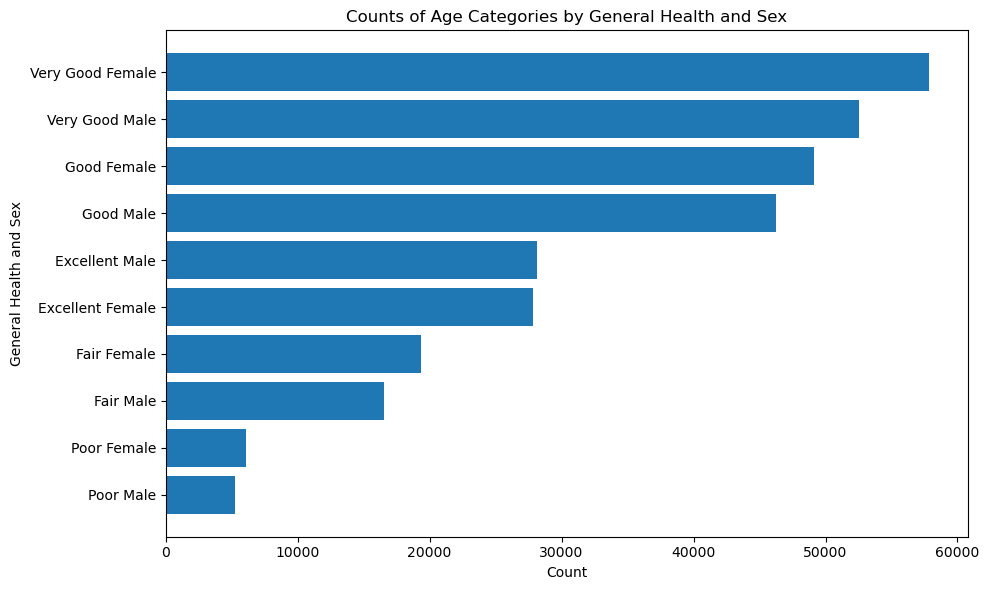

In [25]:
grouped_data = cd.groupby(['General_Health', 'Sex'], as_index=False)[['Age_Category']].count().sort_values(by='Age_Category', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(grouped_data['General_Health'] + ' ' + grouped_data['Sex'], grouped_data['Age_Category'])
plt.xlabel('Count')
plt.ylabel('General Health and Sex')
plt.title('Counts of Age Categories by General Health and Sex')
plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area.

plt.show()


**Above graph we understand that,the most Good health count is Female and lesser is Male**

**High health check up by sex**

In [26]:
# High health check up by sex
grouped_data = cd.groupby(['Sex','Age_Category'],as_index=False)['Checkup'].count().sort_values(by = 'Checkup',ascending = True)
grouped_data

Sex Age_Category  Checkup
1   Female        25-29     7118
0   Female        18-24     8215
14    Male        25-29     8376
2   Female        30-34     8963
25    Male          80+     9104
24    Male        75-79     9305
15    Male        30-34     9465
18    Male        45-49     9968
16    Male        35-39    10239
3   Female        35-39    10367
17    Male        40-44    10392
13    Male        18-24    10466
5   Female        45-49    11000
4   Female        40-44    11203
11  Female        75-79    11400
19    Male        50-54    12129
6   Female        50-54    12968
12  Female          80+    13167
20    Male        55-59    13394
23    Male        70-74    14364
7   Female        55-59    14660
21    Male        60-64    15449
22    Male        65-69    16007
10  Female        70-74    16739
8   Female        60-64    16969
9   Female        65-69    17427

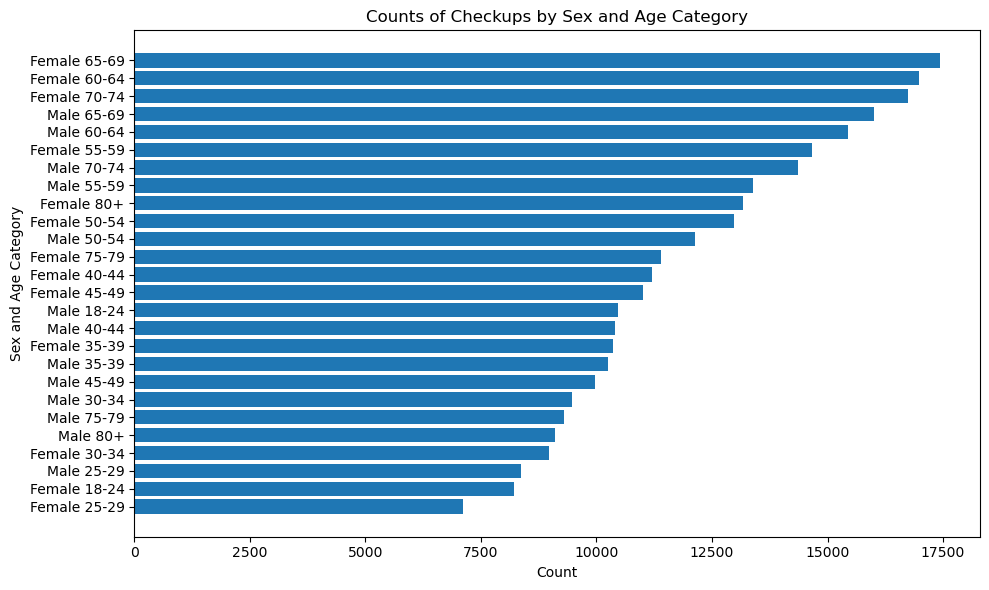

In [27]:
# High health check up by sex
grouped_data = cd.groupby(['Sex', 'Age_Category'], as_index=False)['Checkup'].count().sort_values(by='Checkup', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(grouped_data['Sex'] + ' ' + grouped_data['Age_Category'], grouped_data['Checkup'])
plt.xlabel('Count')
plt.ylabel('Sex and Age Category')
plt.title('Counts of Checkups by Sex and Age Category')
plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area.

plt.show()

**From above graph the most highest health checkup done by female and male count is less**

**Efficiently doing a Exercise**

In [28]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index = False)['Exercise'].count().sort_values(by = 'Exercise',ascending= True).head(10)
grouped_data

Sex Age_Category  Exercise
1   Female        25-29      7118
0   Female        18-24      8215
14    Male        25-29      8376
2   Female        30-34      8963
25    Male          80+      9104
24    Male        75-79      9305
15    Male        30-34      9465
18    Male        45-49      9968
16    Male        35-39     10239
3   Female        35-39     10367

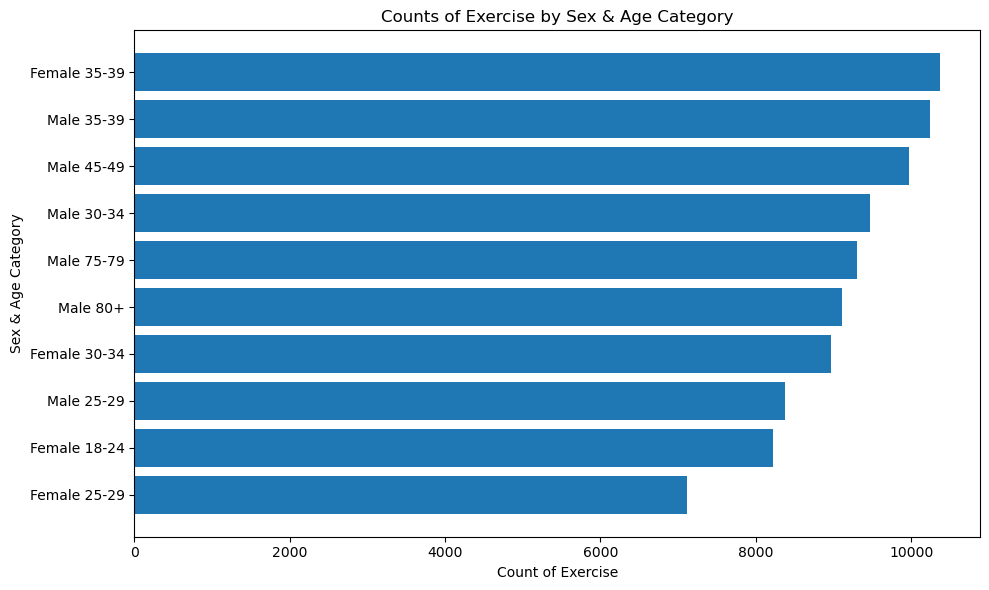

In [29]:
# Efficently doing a Exercise
grouped_data = cd.groupby(['Sex','Age_Category'],as_index = False)['Exercise'].count().sort_values(by = 'Exercise',ascending= True).head(10)
plt.figure(figsize=(10,6))
plt.barh(grouped_data['Sex'] + ' ' + grouped_data['Age_Category'],grouped_data['Exercise'])
plt.xlabel('Count of Exercise')
plt.ylabel('Sex & Age Category')
plt.title('Counts of Exercise by Sex & Age Category')
plt.tight_layout()
plt.show()


**From the above graph the most eifficent exercises done by female and Male are less**

**Heart_Disease by**

In [30]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index = False)['Heart_Disease'].count().sort_values(by = 'Heart_Disease',ascending = True).head(10)
grouped_data

Sex Age_Category  Heart_Disease
1   Female        25-29           7118
0   Female        18-24           8215
14    Male        25-29           8376
2   Female        30-34           8963
25    Male          80+           9104
24    Male        75-79           9305
15    Male        30-34           9465
18    Male        45-49           9968
16    Male        35-39          10239
3   Female        35-39          10367

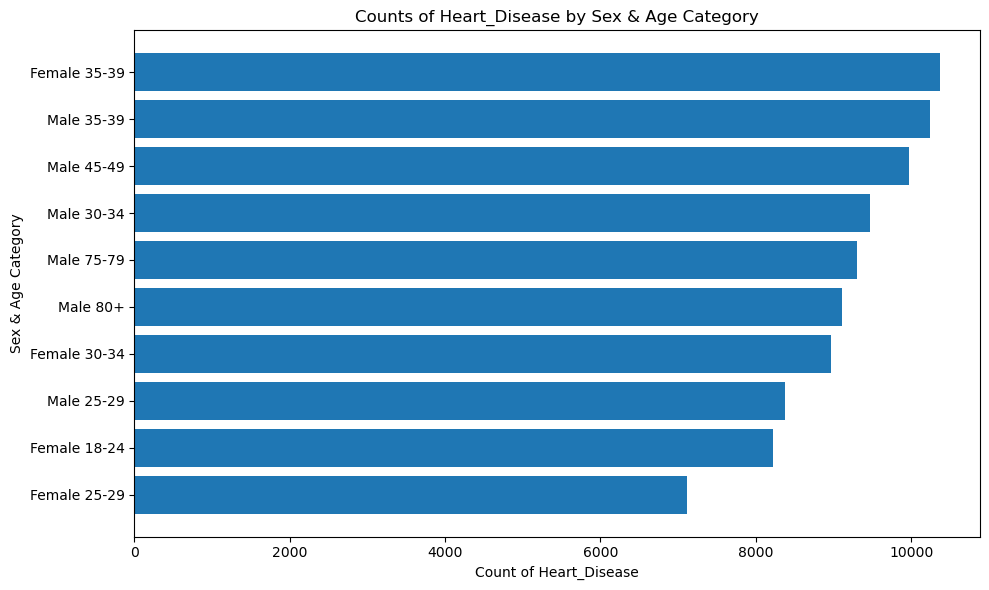

In [31]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index = False)['Heart_Disease'].count().sort_values(by = 'Heart_Disease',ascending = True).head(10)
plt.figure(figsize=(10,6))
plt.barh(grouped_data['Sex'] + ' ' + grouped_data['Age_Category'],grouped_data['Heart_Disease'])
plt.xlabel('Count of Heart_Disease')
plt.ylabel('Sex & Age Category')
plt.title('Counts of Heart_Disease by Sex & Age Category')
plt.tight_layout()
plt.show()

**Female has high count of heart disease  and male count is less**

In [32]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index =False)['Skin_Cancer'].count().sort_values(by = 'Skin_Cancer',ascending = True).head(10)
grouped_data

Sex Age_Category  Skin_Cancer
1   Female        25-29         7118
0   Female        18-24         8215
14    Male        25-29         8376
2   Female        30-34         8963
25    Male          80+         9104
24    Male        75-79         9305
15    Male        30-34         9465
18    Male        45-49         9968
16    Male        35-39        10239
3   Female        35-39        10367

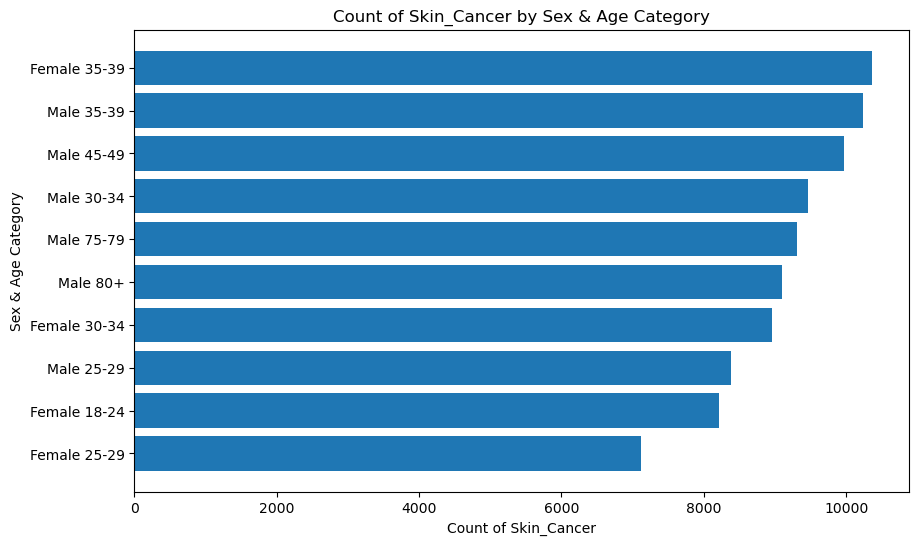

In [33]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index =False)['Skin_Cancer'].count().sort_values(by = 'Skin_Cancer',ascending = True).head(10)

plt.figure(figsize=(10,6))
plt.barh(grouped_data['Sex'] + ' ' + grouped_data['Age_Category'],grouped_data['Skin_Cancer'])
plt.xlabel('Count of Skin_Cancer')
plt.ylabel('Sex & Age Category')
plt.title('Count of Skin_Cancer by Sex & Age Category')
plt.tight_layout
plt.show()

**From above graph we can see the most skin_cancer cause to Female and male suffer less**

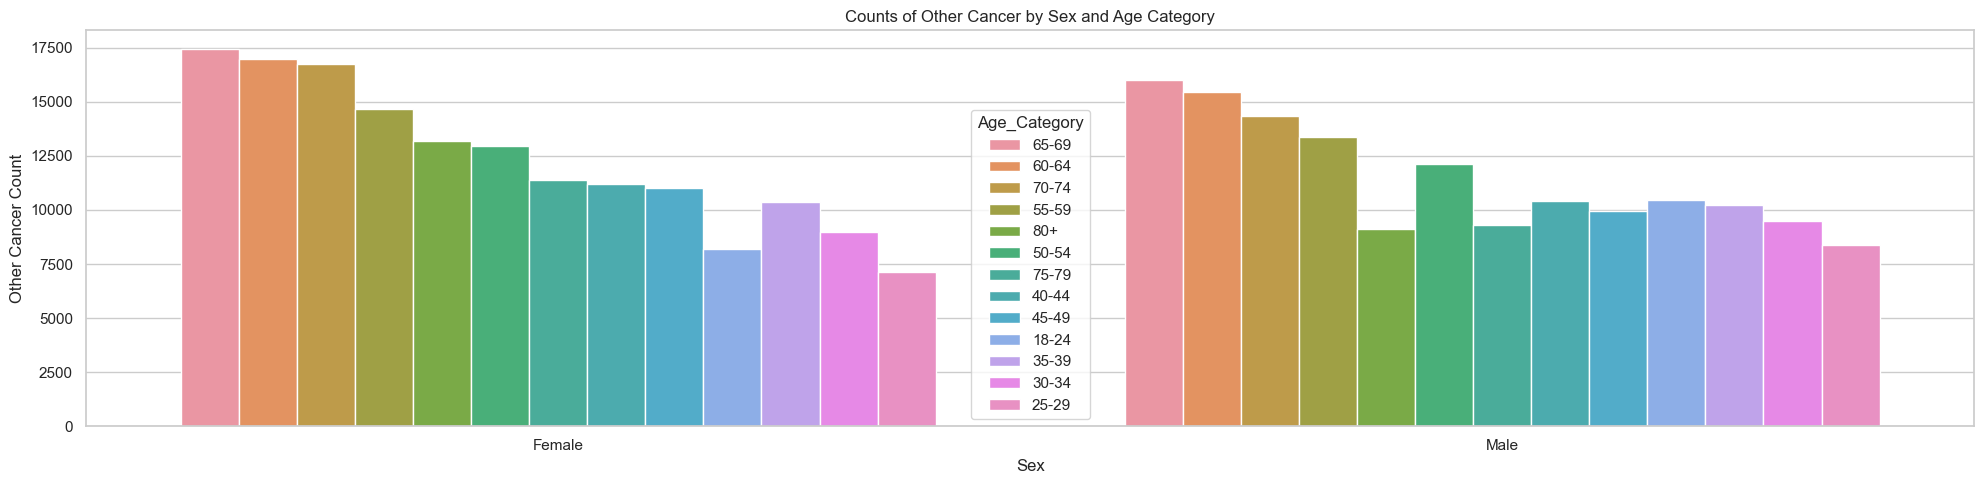

In [34]:
# Other cancer 
grouped_data = cd.groupby(['Sex', 'Age_Category'], as_index=False)['Other_Cancer'].count().sort_values(by='Other_Cancer', ascending=False)

# Set the seaborn style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(20, 5))

# Create the bar plot with 'hue'
sns.barplot(data=grouped_data, x='Sex', y='Other_Cancer', hue='Age_Category')

plt.xlabel('Sex')
plt.ylabel('Other Cancer Count')
plt.title('Counts of Other Cancer by Sex and Age Category')
plt.tight_layout()
plt.show()


**From group the most affected by other Cancer are Female and male are less**

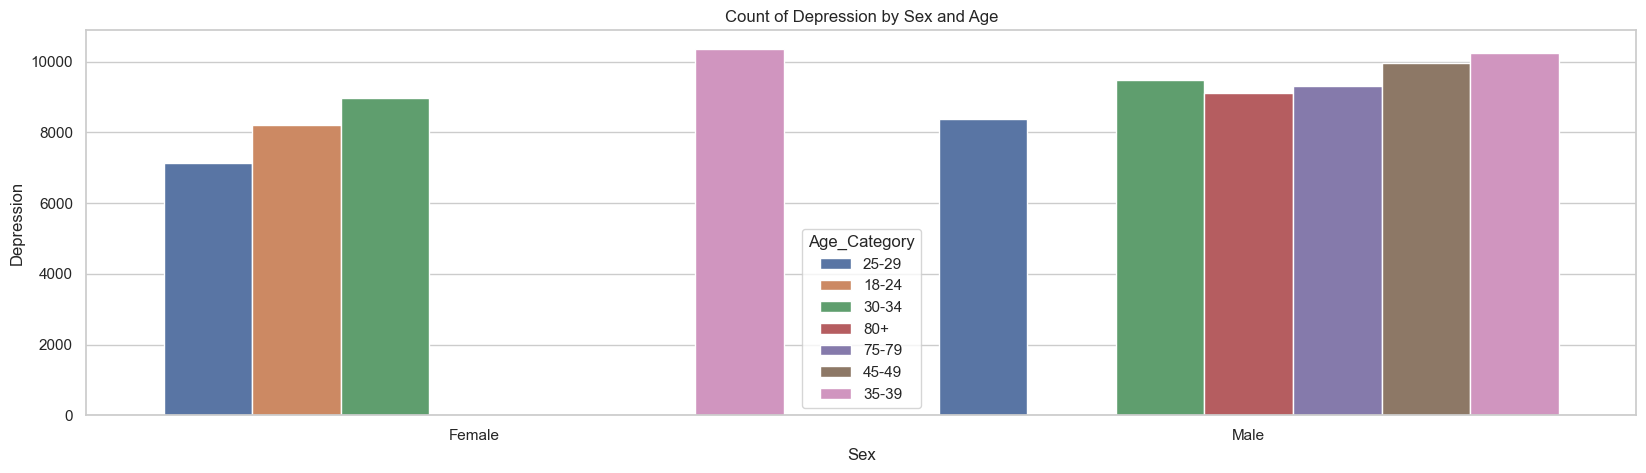

In [35]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index = False)['Depression'].count().sort_values(by = 'Depression',ascending= True).head(10)

sns.set(style = 'whitegrid')

plt.figure(figsize=(20,5))

sns.barplot(data=grouped_data,x = 'Sex',y='Depression',hue= 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Depression')
plt.title('Count of Depression by Sex and Age')
plt.tight_layout
plt.show()

**From above graph we can see the most suffer from Depression are Male ,and Female are less**

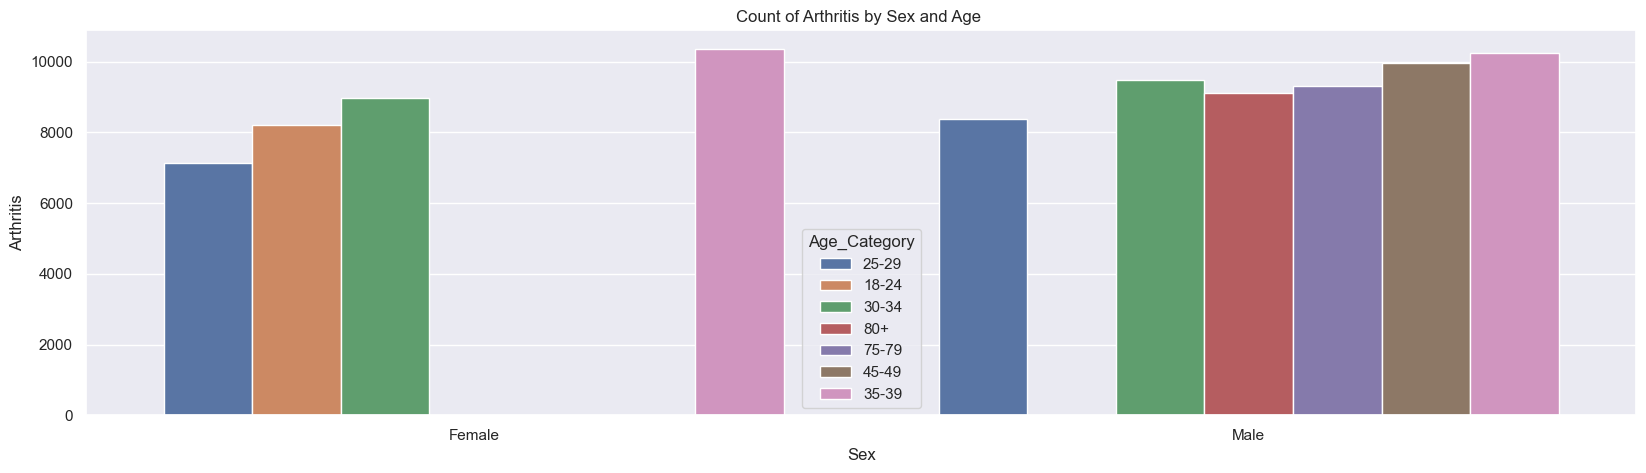

In [37]:
grouped_data =cd.groupby(['Sex','Age_Category'],as_index=False)['Arthritis'].count().sort_values(by = 'Arthritis',ascending = True).head(10)

sns.set(style = 'darkgrid')

plt.figure(figsize=(20,5))

sns.barplot(data=grouped_data,x = 'Sex',y = 'Arthritis',hue = 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Arthritis')
plt.title('Count of Arthritis by Sex and Age ')
plt.tight_layout
plt.show()

**From graph we can see the most affected by Arthritis are Male  and count is less Female**

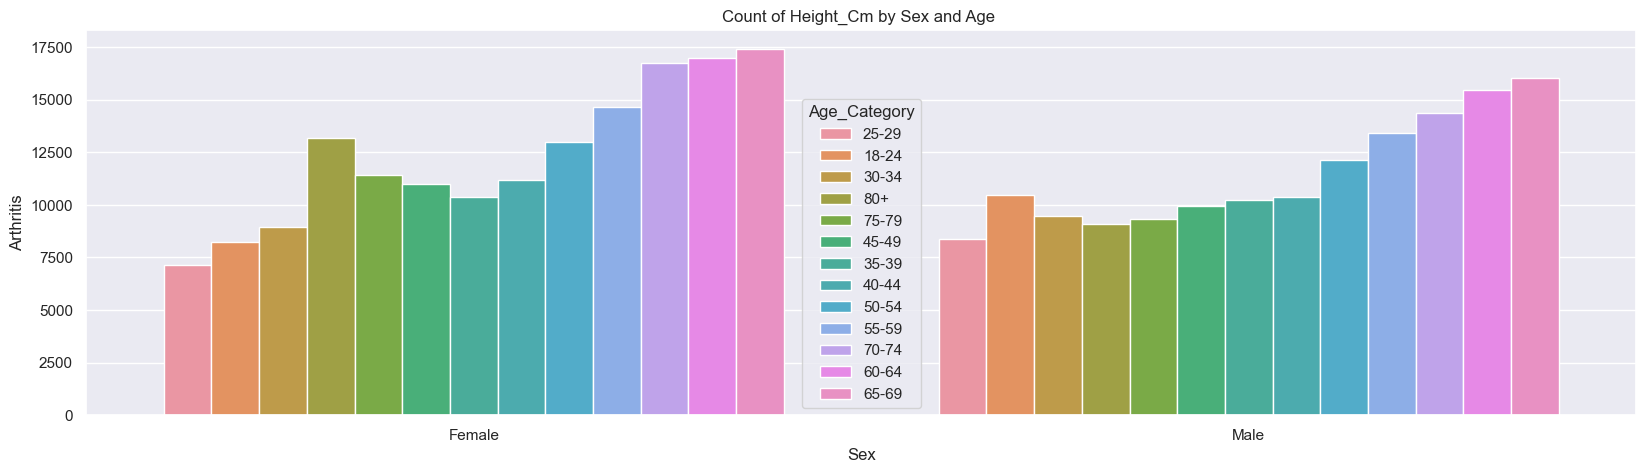

In [38]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index=False)['Height_(cm)'].count().sort_values(by = 'Height_(cm)',ascending = True)

sns.set(style = 'darkgrid')

plt.figure(figsize=(20,5))
sns.barplot(data=grouped_data,x ='Sex',y = 'Height_(cm)',hue = 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Arthritis')
plt.title('Count of Height_Cm by Sex and Age ')
plt.tight_layout
plt.show()

**From above graph we can see the heights count of height is Female and male height count is less**

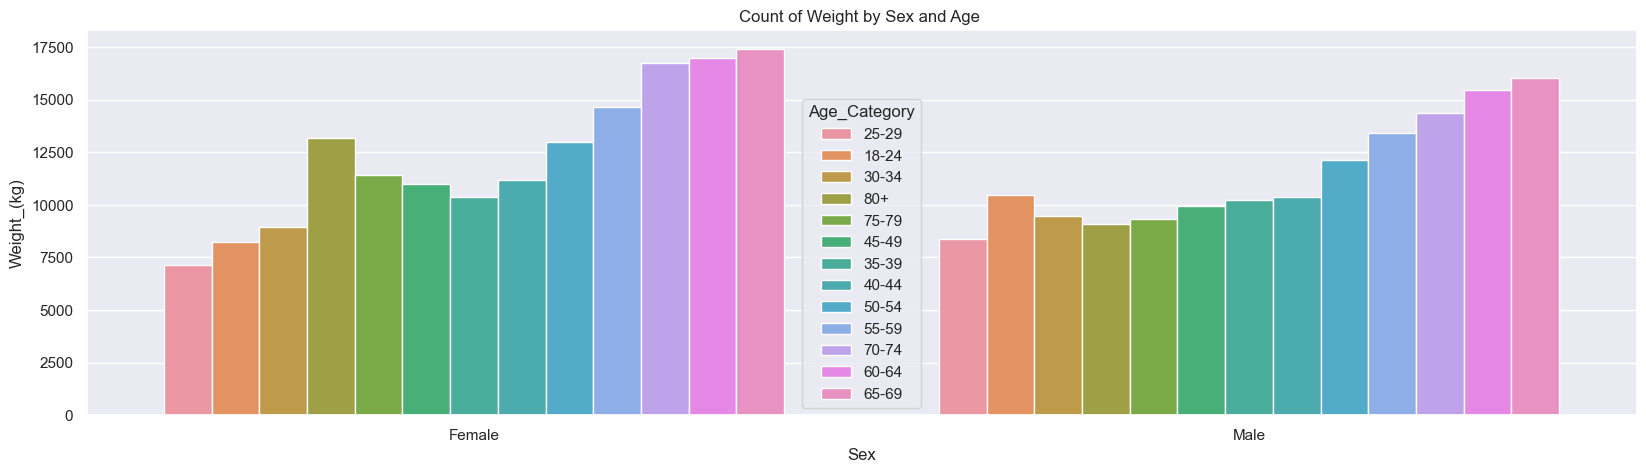

In [39]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index=False)['Weight_(kg)'].count().sort_values(by = 'Weight_(kg)',ascending = True)

sns.set(style = 'darkgrid')

plt.figure(figsize=(20,5))
sns.barplot(data=grouped_data,x ='Sex',y = 'Weight_(kg)',hue = 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Weight_(kg)')
plt.title('Count of Weight by Sex and Age ')
plt.tight_layout
plt.show()

**From above graph we can see the heights count of weight is in Female and male weigh count less**

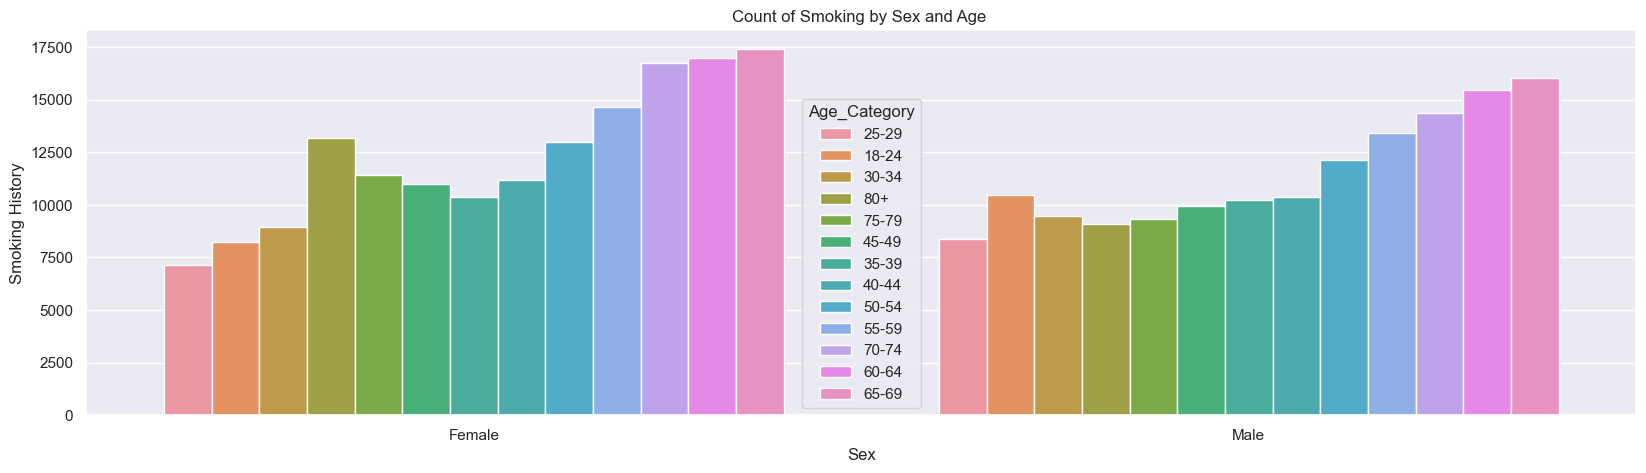

In [40]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index=False)['Smoking_History'].count().sort_values(by = 'Smoking_History',ascending = True)

sns.set(style = 'darkgrid')

plt.figure(figsize=(20,5))
sns.barplot(data=grouped_data,x ='Sex',y = 'Smoking_History',hue = 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Smoking History')
plt.title('Count of Smoking by Sex and Age ')
plt.tight_layout
plt.show()

**From graph we can see the most smoked by Female and less by male**

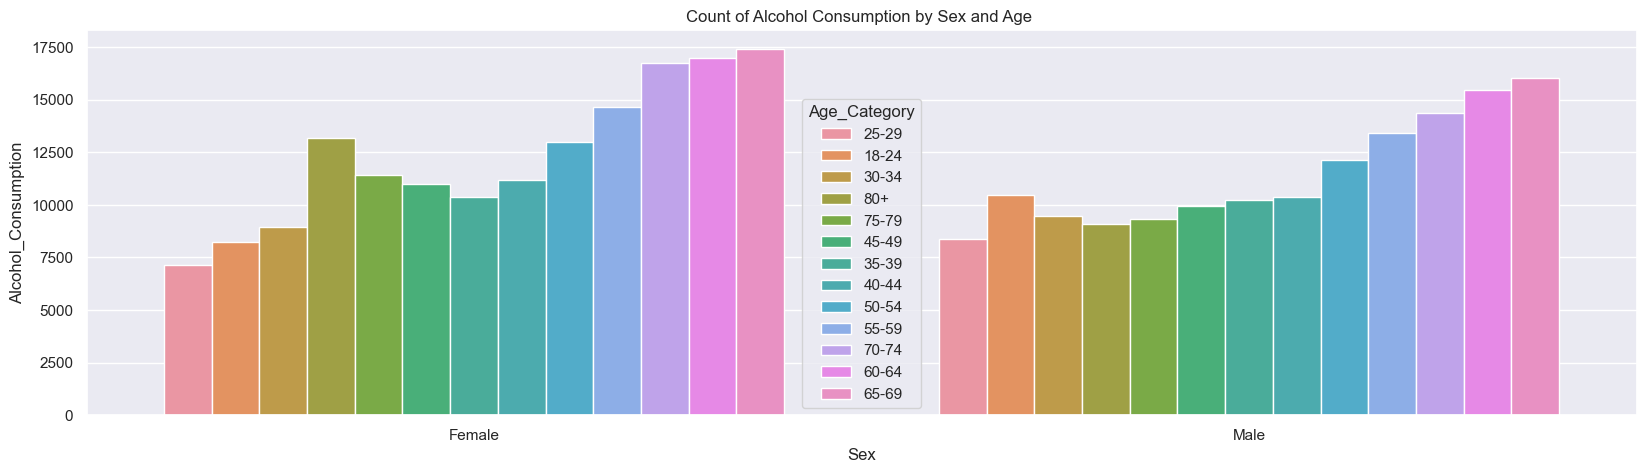

In [41]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index=False)['Alcohol_Consumption'].count().sort_values(by = 'Alcohol_Consumption',ascending = True)

sns.set(style = 'darkgrid')

plt.figure(figsize=(20,5))
sns.barplot(data=grouped_data,x ='Sex',y = 'Alcohol_Consumption',hue = 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Alcohol_Consumption')
plt.title('Count of Alcohol Consumption by Sex and Age ')
plt.tight_layout
plt.show()

**From graph we see the most Alcohol consume by Female and less by male**

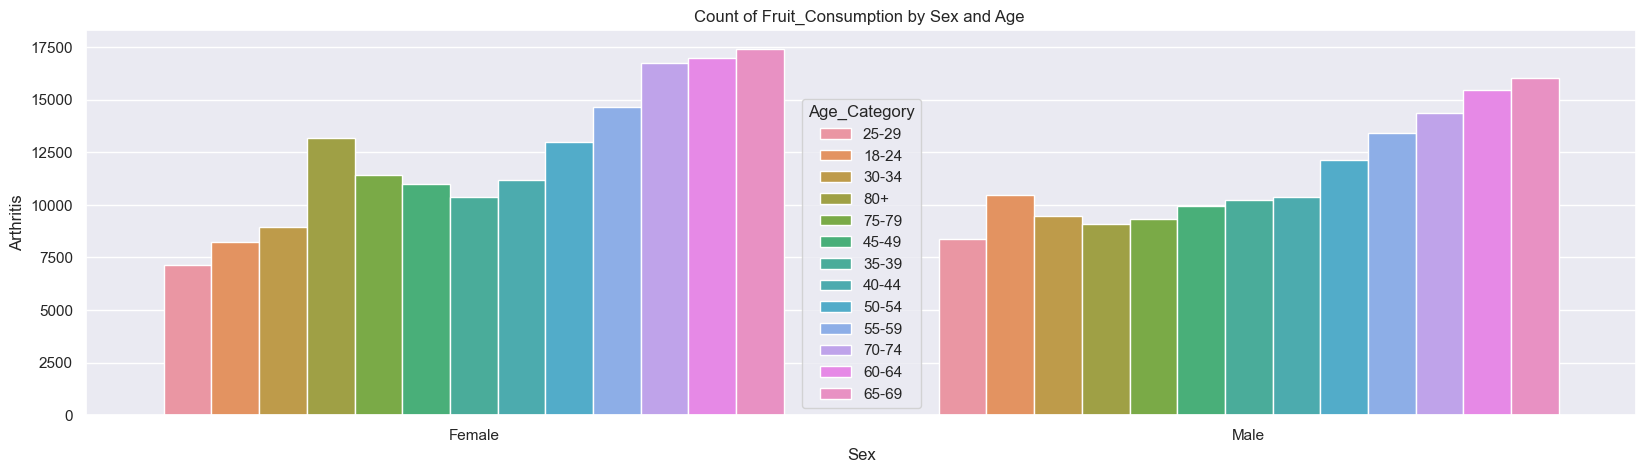

In [42]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index=False)['Fruit_Consumption'].count().sort_values(by = 'Fruit_Consumption',ascending = True)

sns.set(style = 'darkgrid')

plt.figure(figsize=(20,5))
sns.barplot(data=grouped_data,x ='Sex',y = 'Fruit_Consumption',hue = 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Arthritis')
plt.title('Count of Fruit_Consumption by Sex and Age ')
plt.tight_layout
plt.show()

**From above graph we can see the most fruit Consumption by female and less by male**

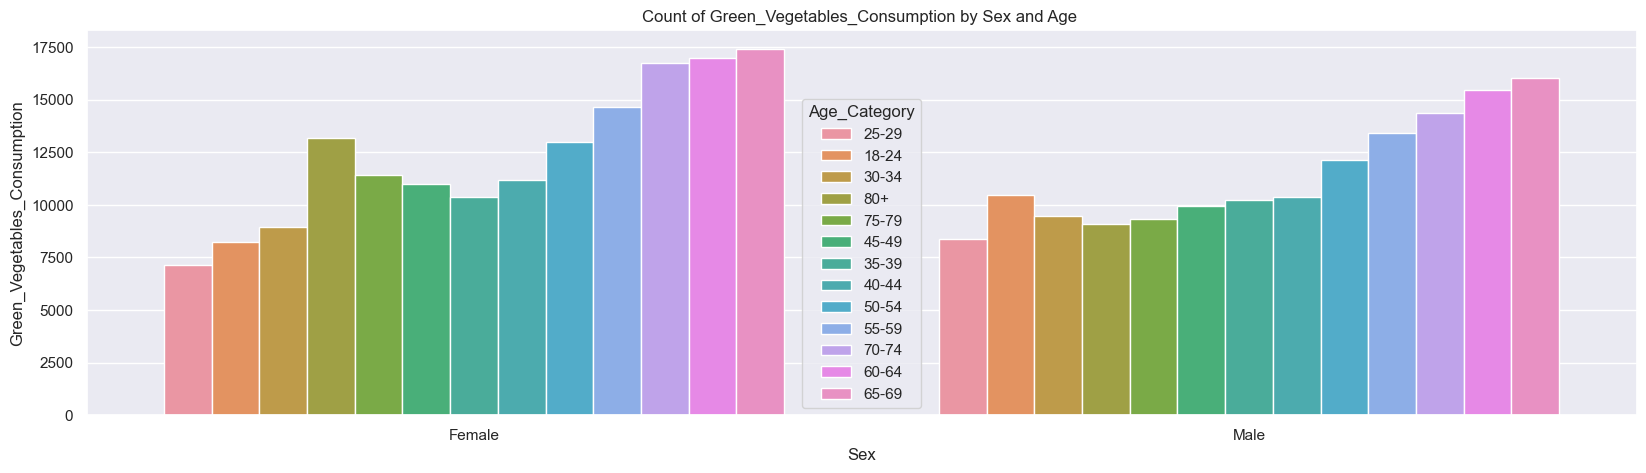

In [43]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index=False)['Green_Vegetables_Consumption'].count().sort_values(by = 'Green_Vegetables_Consumption',ascending = True)

sns.set(style = 'darkgrid')

plt.figure(figsize=(20,5))
sns.barplot(data=grouped_data,x ='Sex',y = 'Green_Vegetables_Consumption',hue = 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Green_Vegetables_Consumption')
plt.title('Count of Green_Vegetables_Consumption by Sex and Age ')
plt.tight_layout
plt.show()

**From above graph we can see the most Vegetable consume by Female and less by male**

In [44]:
cd.columns

Index(['General_Health', 'Sex', 'Age_Category', 'Checkup', 'Exercise',
       'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression',
       'Diabetes', 'Arthritis', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

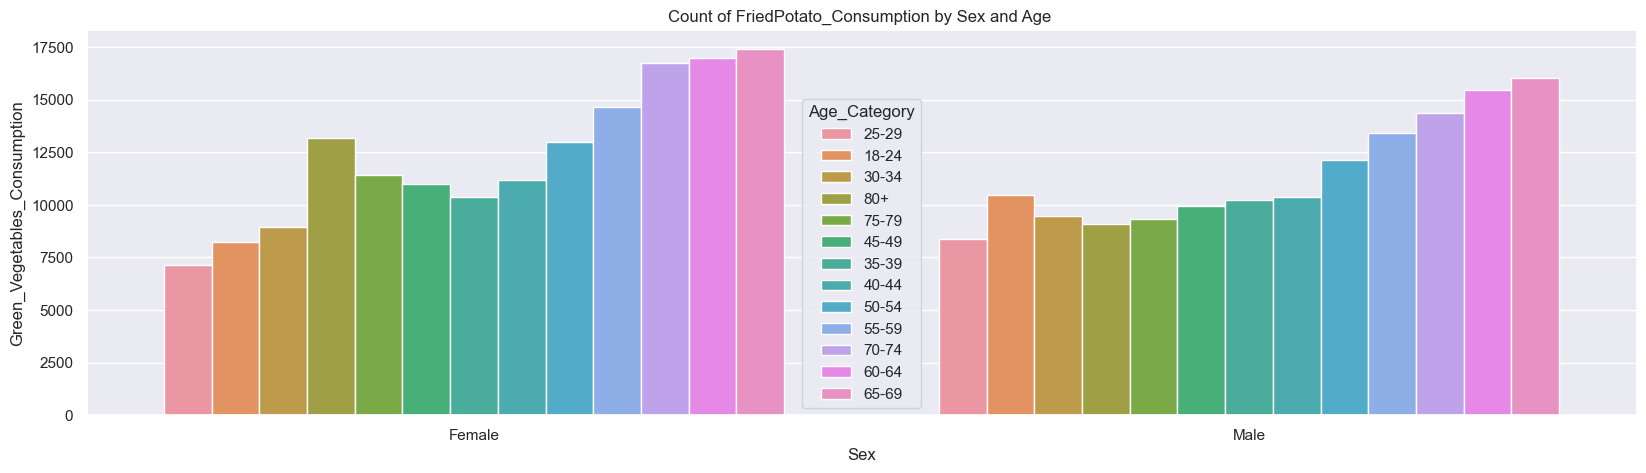

In [45]:
grouped_data = cd.groupby(['Sex','Age_Category'],as_index=False)['FriedPotato_Consumption'].count().sort_values(by = 'FriedPotato_Consumption',ascending = True)

sns.set(style = 'darkgrid')

plt.figure(figsize=(20,5))
sns.barplot(data=grouped_data,x ='Sex',y = 'FriedPotato_Consumption',hue = 'Age_Category')

plt.xlabel('Sex')
plt.ylabel('Green_Vegetables_Consumption')
plt.title('Count of FriedPotato_Consumption by Sex and Age ')
plt.tight_layout
plt.show()

**From above we can see the most Fried Potao consume by female and less by male**

**Conculsion**

**The heights good Health has by Female and less by male**